In [36]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"

In [37]:
df_train = pd.read_csv("C:\\Users\\Timofey\\Documents\\Data\\dogs_n_cats.csv")
# df_test = pd.read_csv("C:\\Users\\Timofey\\Documents\\Data\\test_iris.csv")

In [38]:
df_train.head(10)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
5,26,31.2,1,0,0,собачка
6,20,24.0,1,1,0,собачка
7,23,27.6,1,1,0,собачка
8,21,25.2,1,1,0,собачка
9,28,33.6,1,1,0,собачка


In [39]:
X_train = df_train.drop(['Вид'], axis=1)
y_train = df_train.Вид
X_train.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [40]:
max_depth_val = range(1, 100)
for max_depth in max_depth_val:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'tr_score': [tr_score]})
    score_data = pd.concat([score_data, temp_score_data])

In [41]:
score_data.head(5)

,max_depth,tr_score
0,1,1.0
0,2,1.0
0,3,1.0
0,4,1.0
0,5,1.0


<Axes: xlabel='max_depth', ylabel='score'>

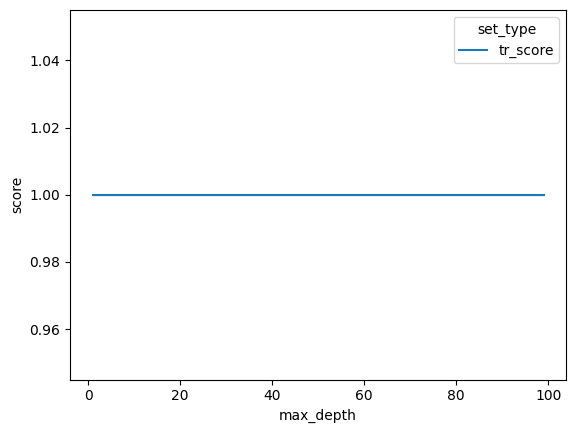

In [42]:
scores_data_long = pd.melt(score_data, id_vars = ['max_depth'], value_vars = ['tr_score'], var_name = 'set_type', value_name = 'score')

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [49]:
df_test = pd.read_json("C:\\Users\\Timofey\\Documents\\Data\\dataset_209691_15.txt")
df_test.head(10)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,30,36.0,1,1,0
1,21,25.2,1,1,0
2,26,31.2,0,1,0
3,25,30.0,1,1,0
4,21,25.2,1,1,0
5,26,31.2,1,1,0
6,33,39.6,1,1,0
7,23,27.6,1,1,0
8,26,31.2,1,1,0
9,21,25.2,1,1,0


In [50]:
result = clf.predict(df_test)

In [51]:
print(result)

['собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка' 'собачка'
 'собачка' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик'
 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик' 'котик']


In [52]:
pd.Series(result)[result == 'собачка'].count()

57

In [53]:
pd.Series(result)[result == 'котик'].count()

43